In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from scipy.interpolate import make_interp_spline

#Loading Source Data File
file_path = '../../Source Data File.xlsx'
sheet_name = 'Figure 2A-2F'
df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
fs = 2000
factor = 0.1

## FIGURE 2A

<Figure size 1500x500 with 0 Axes>

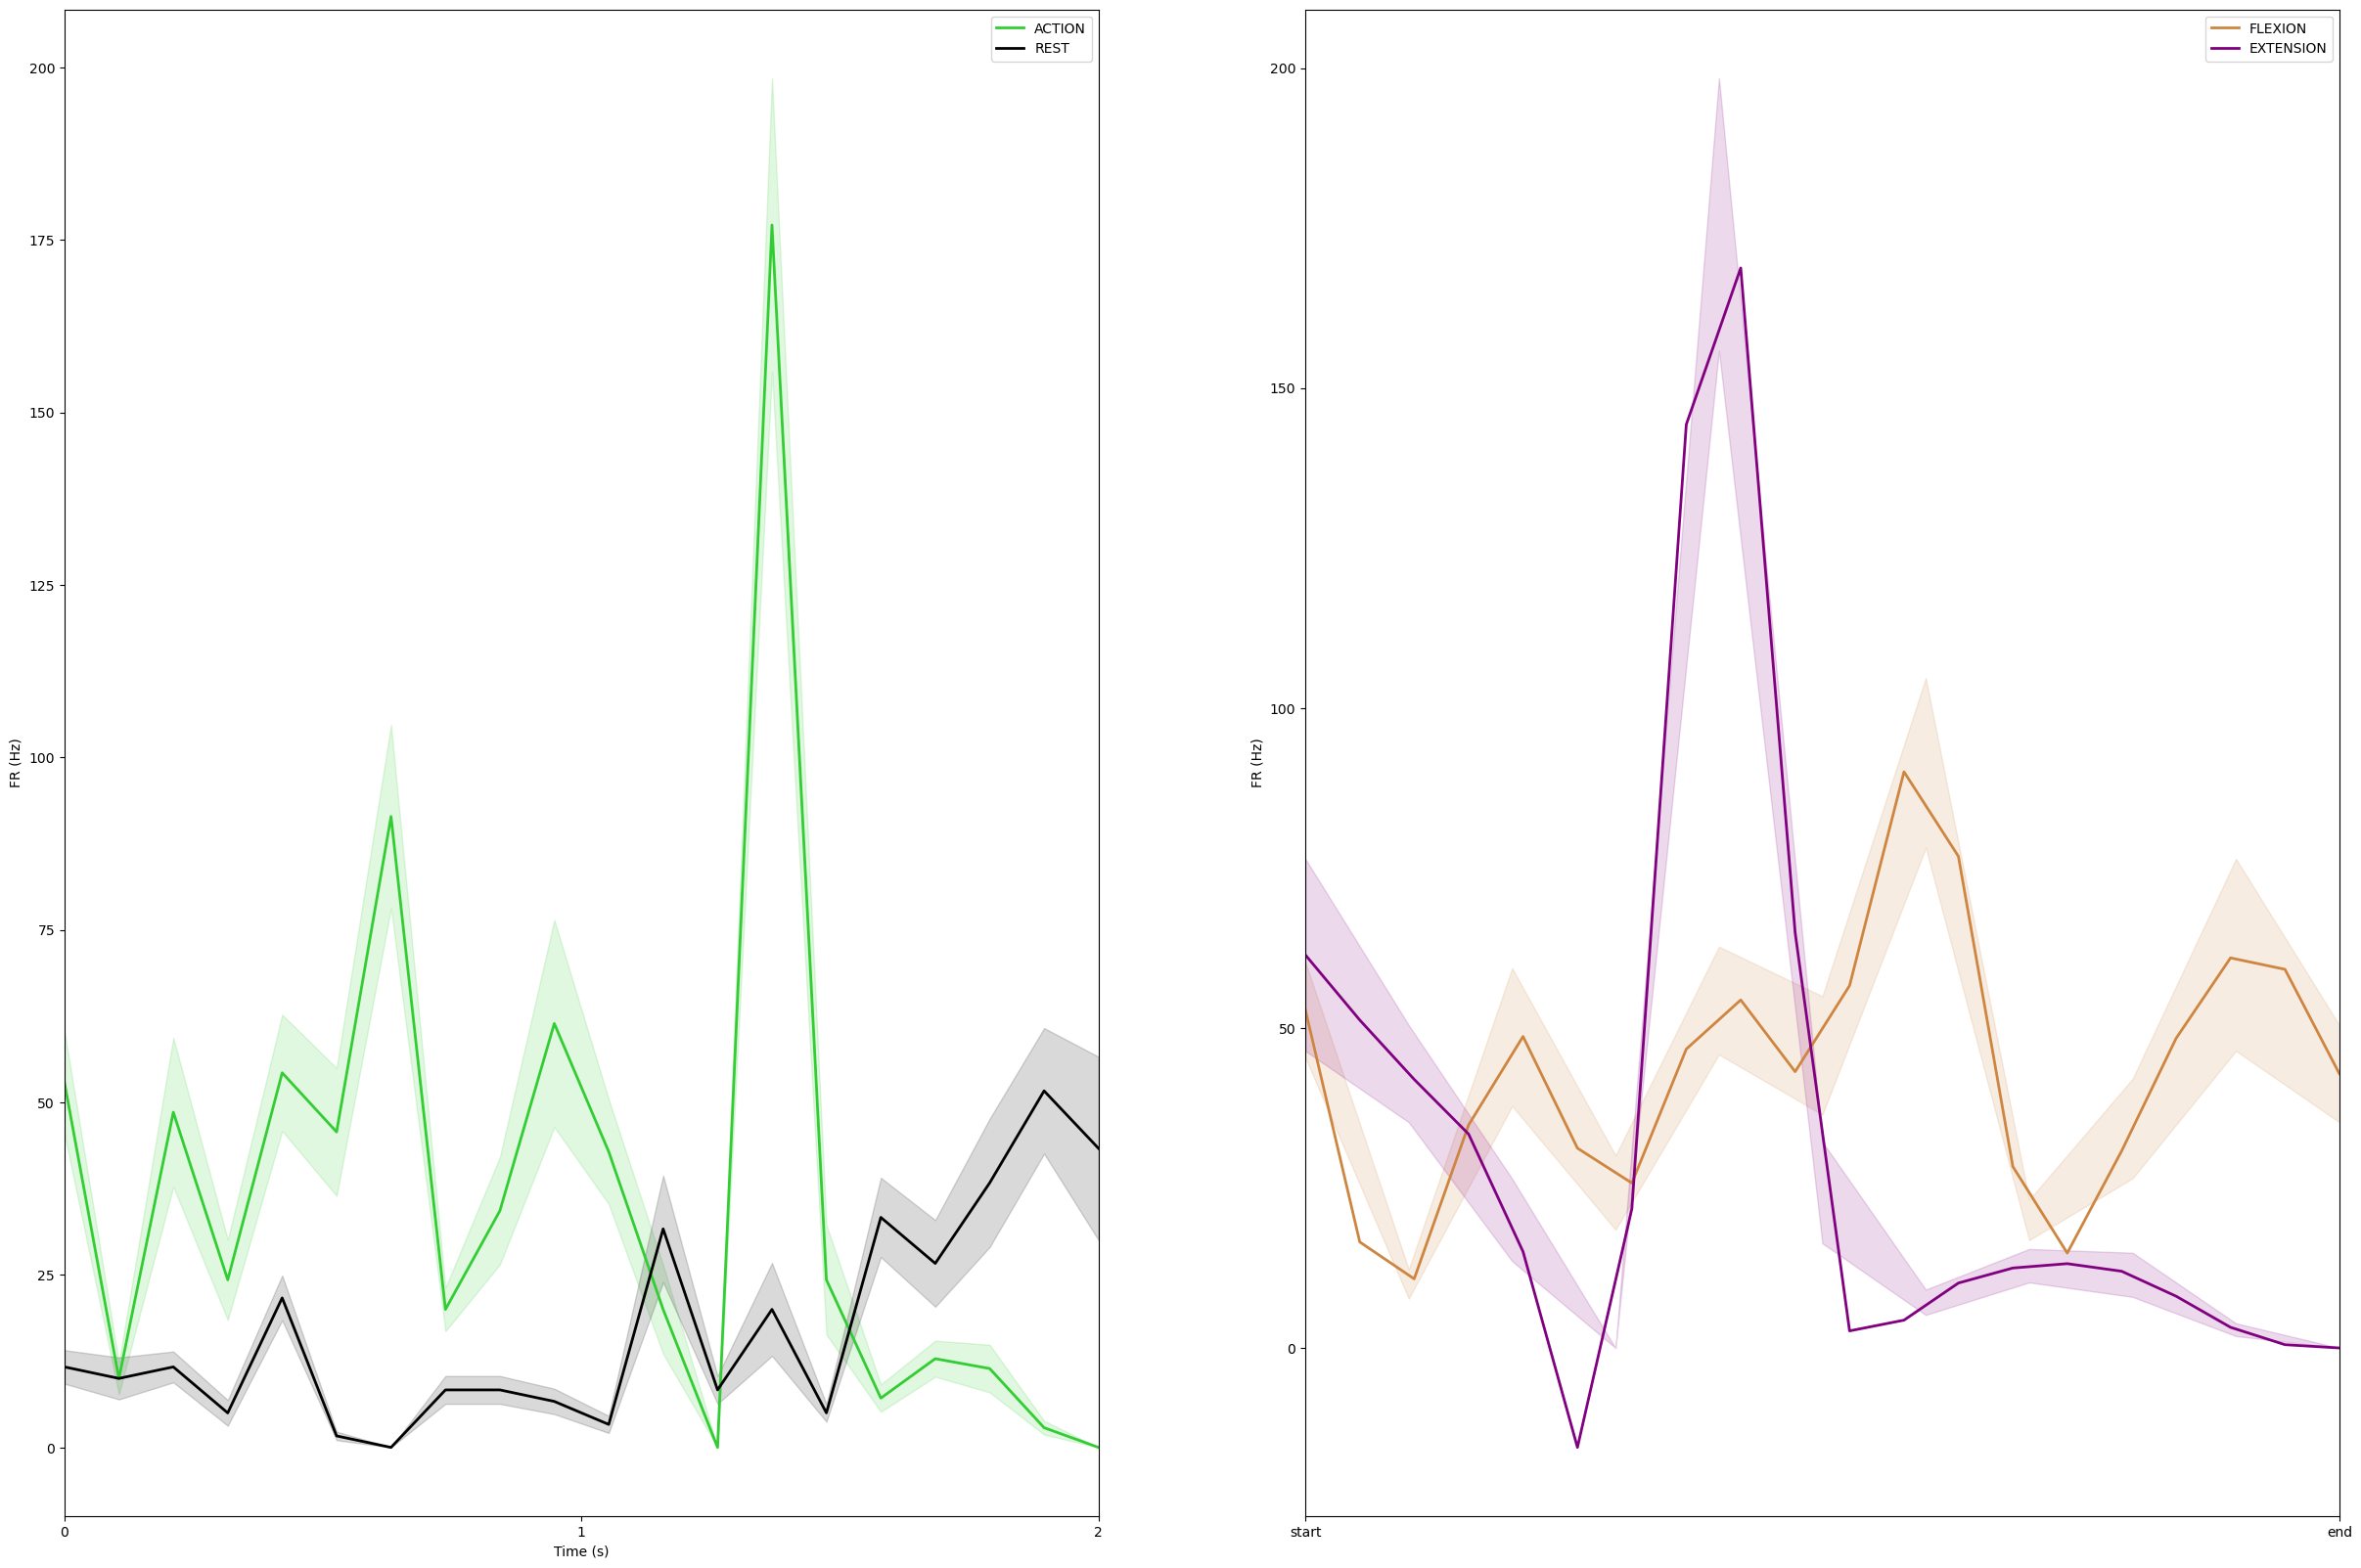

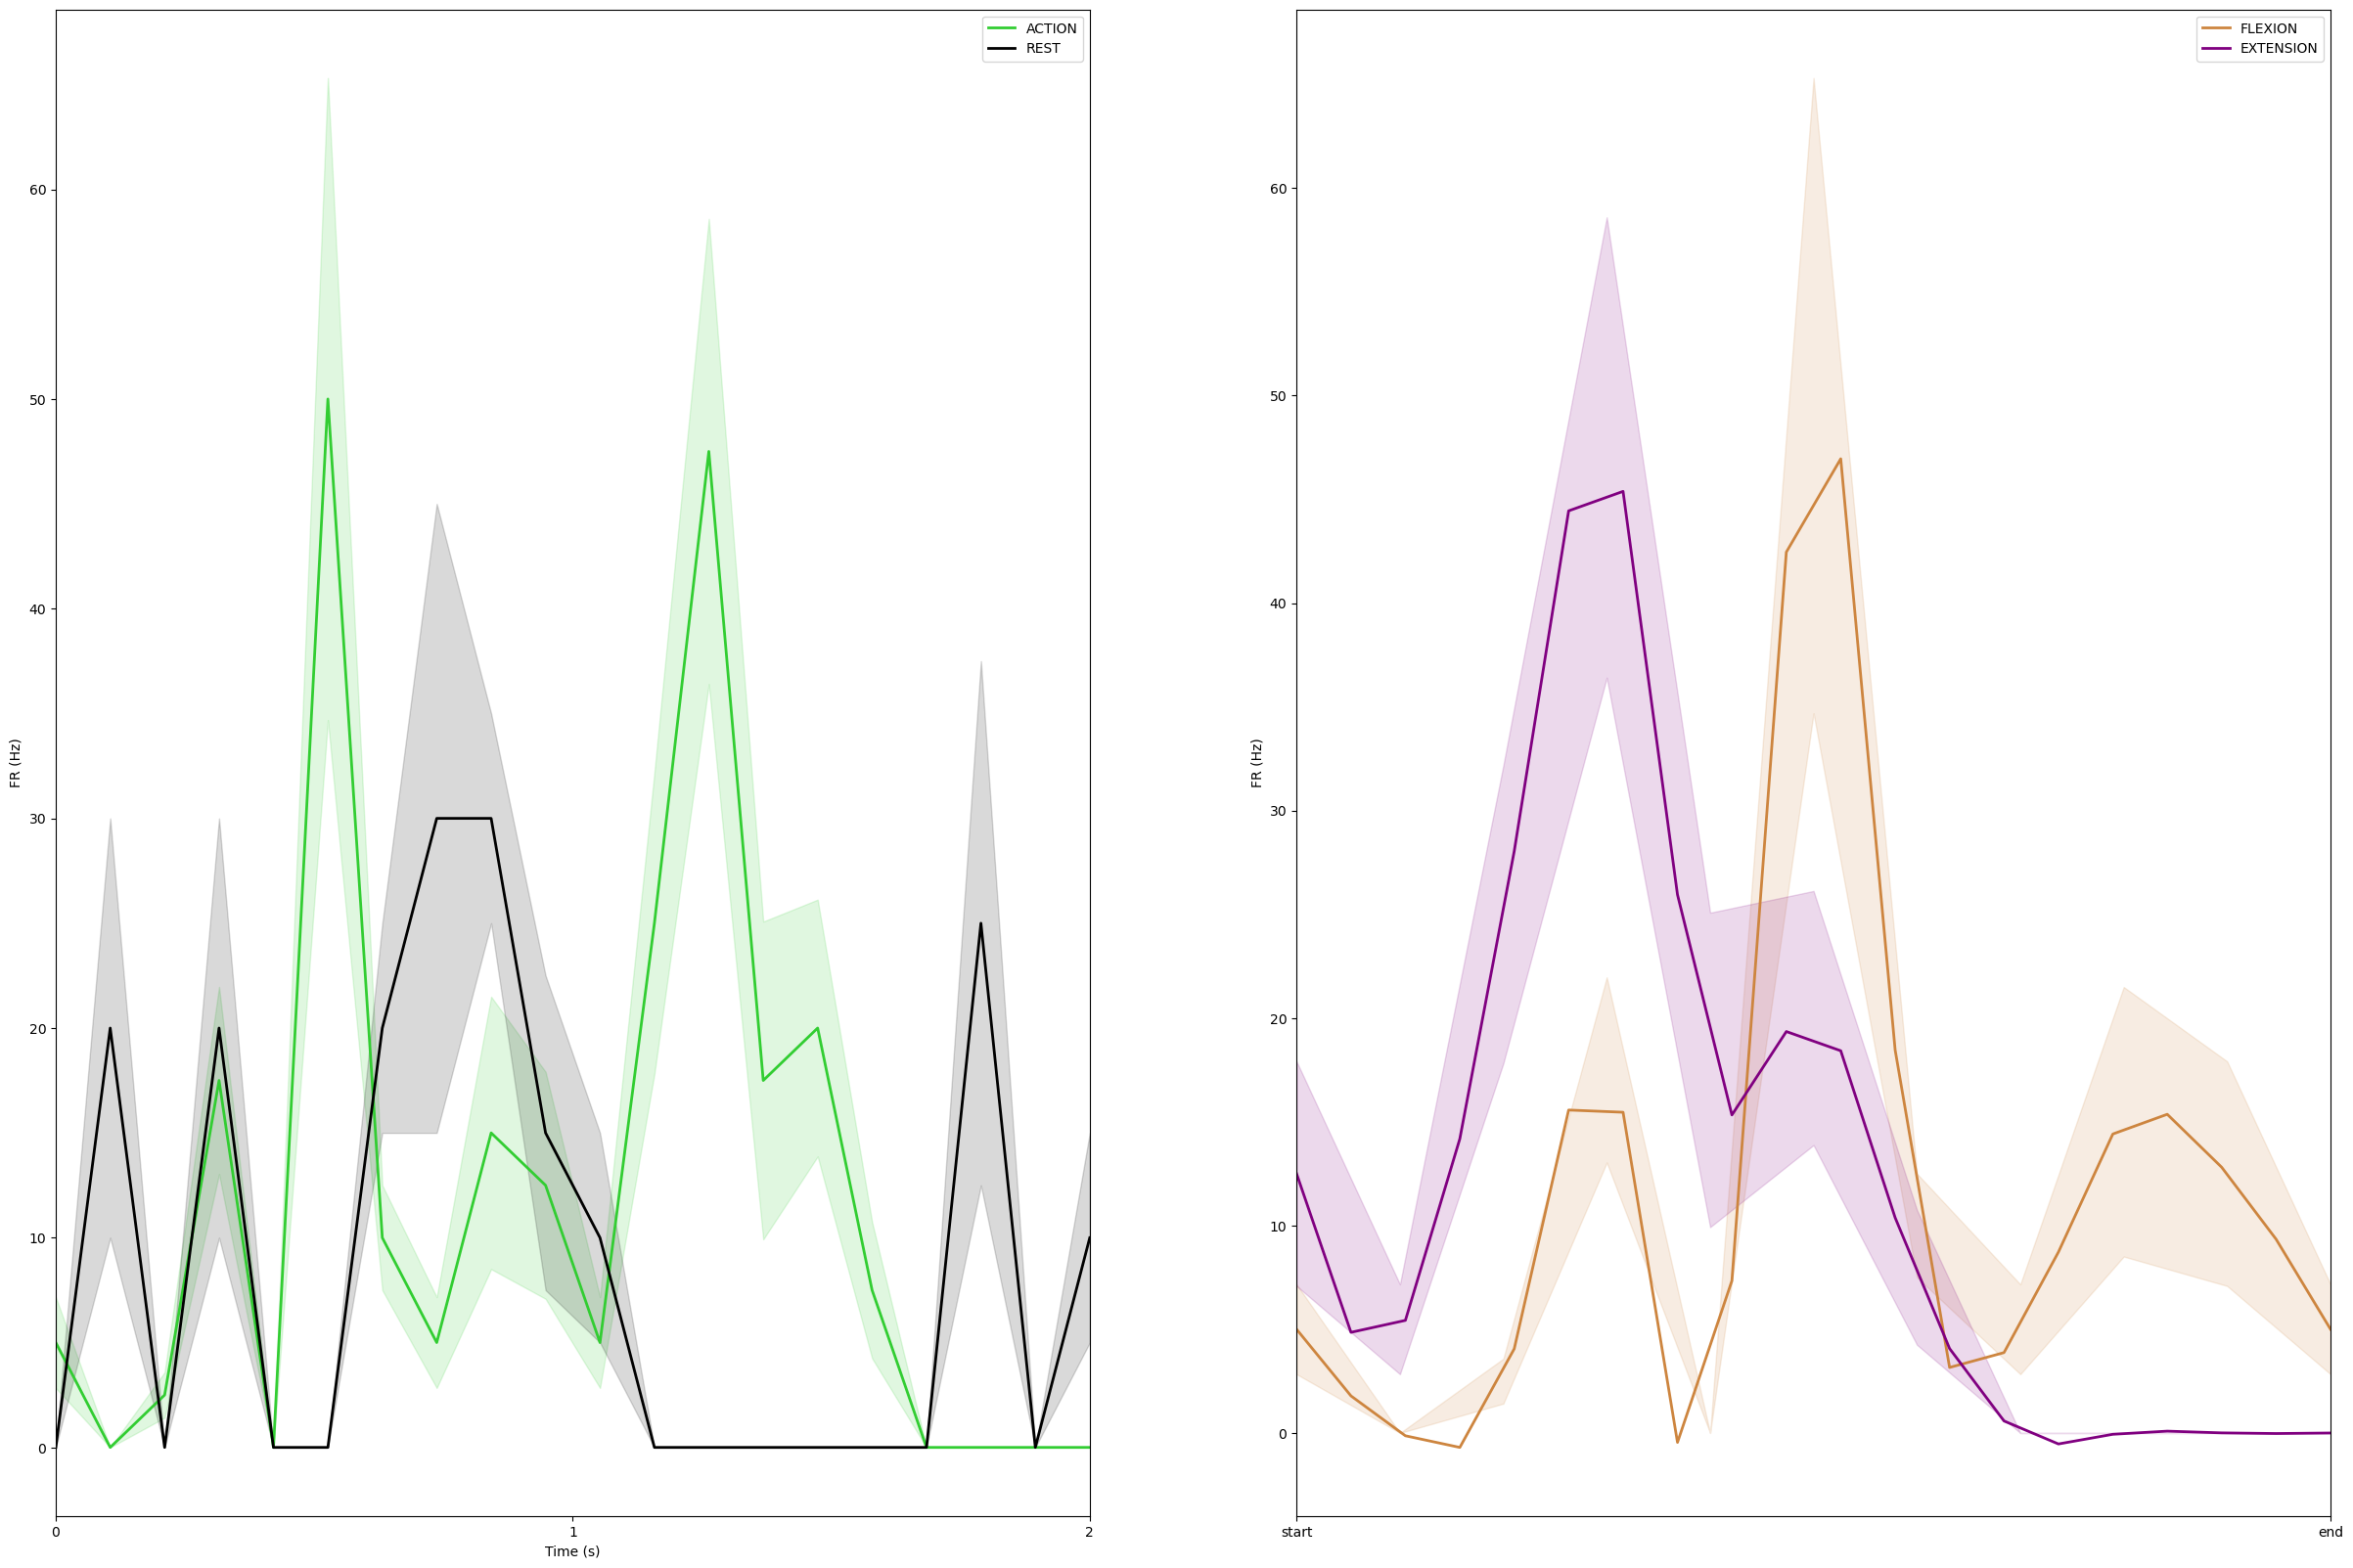

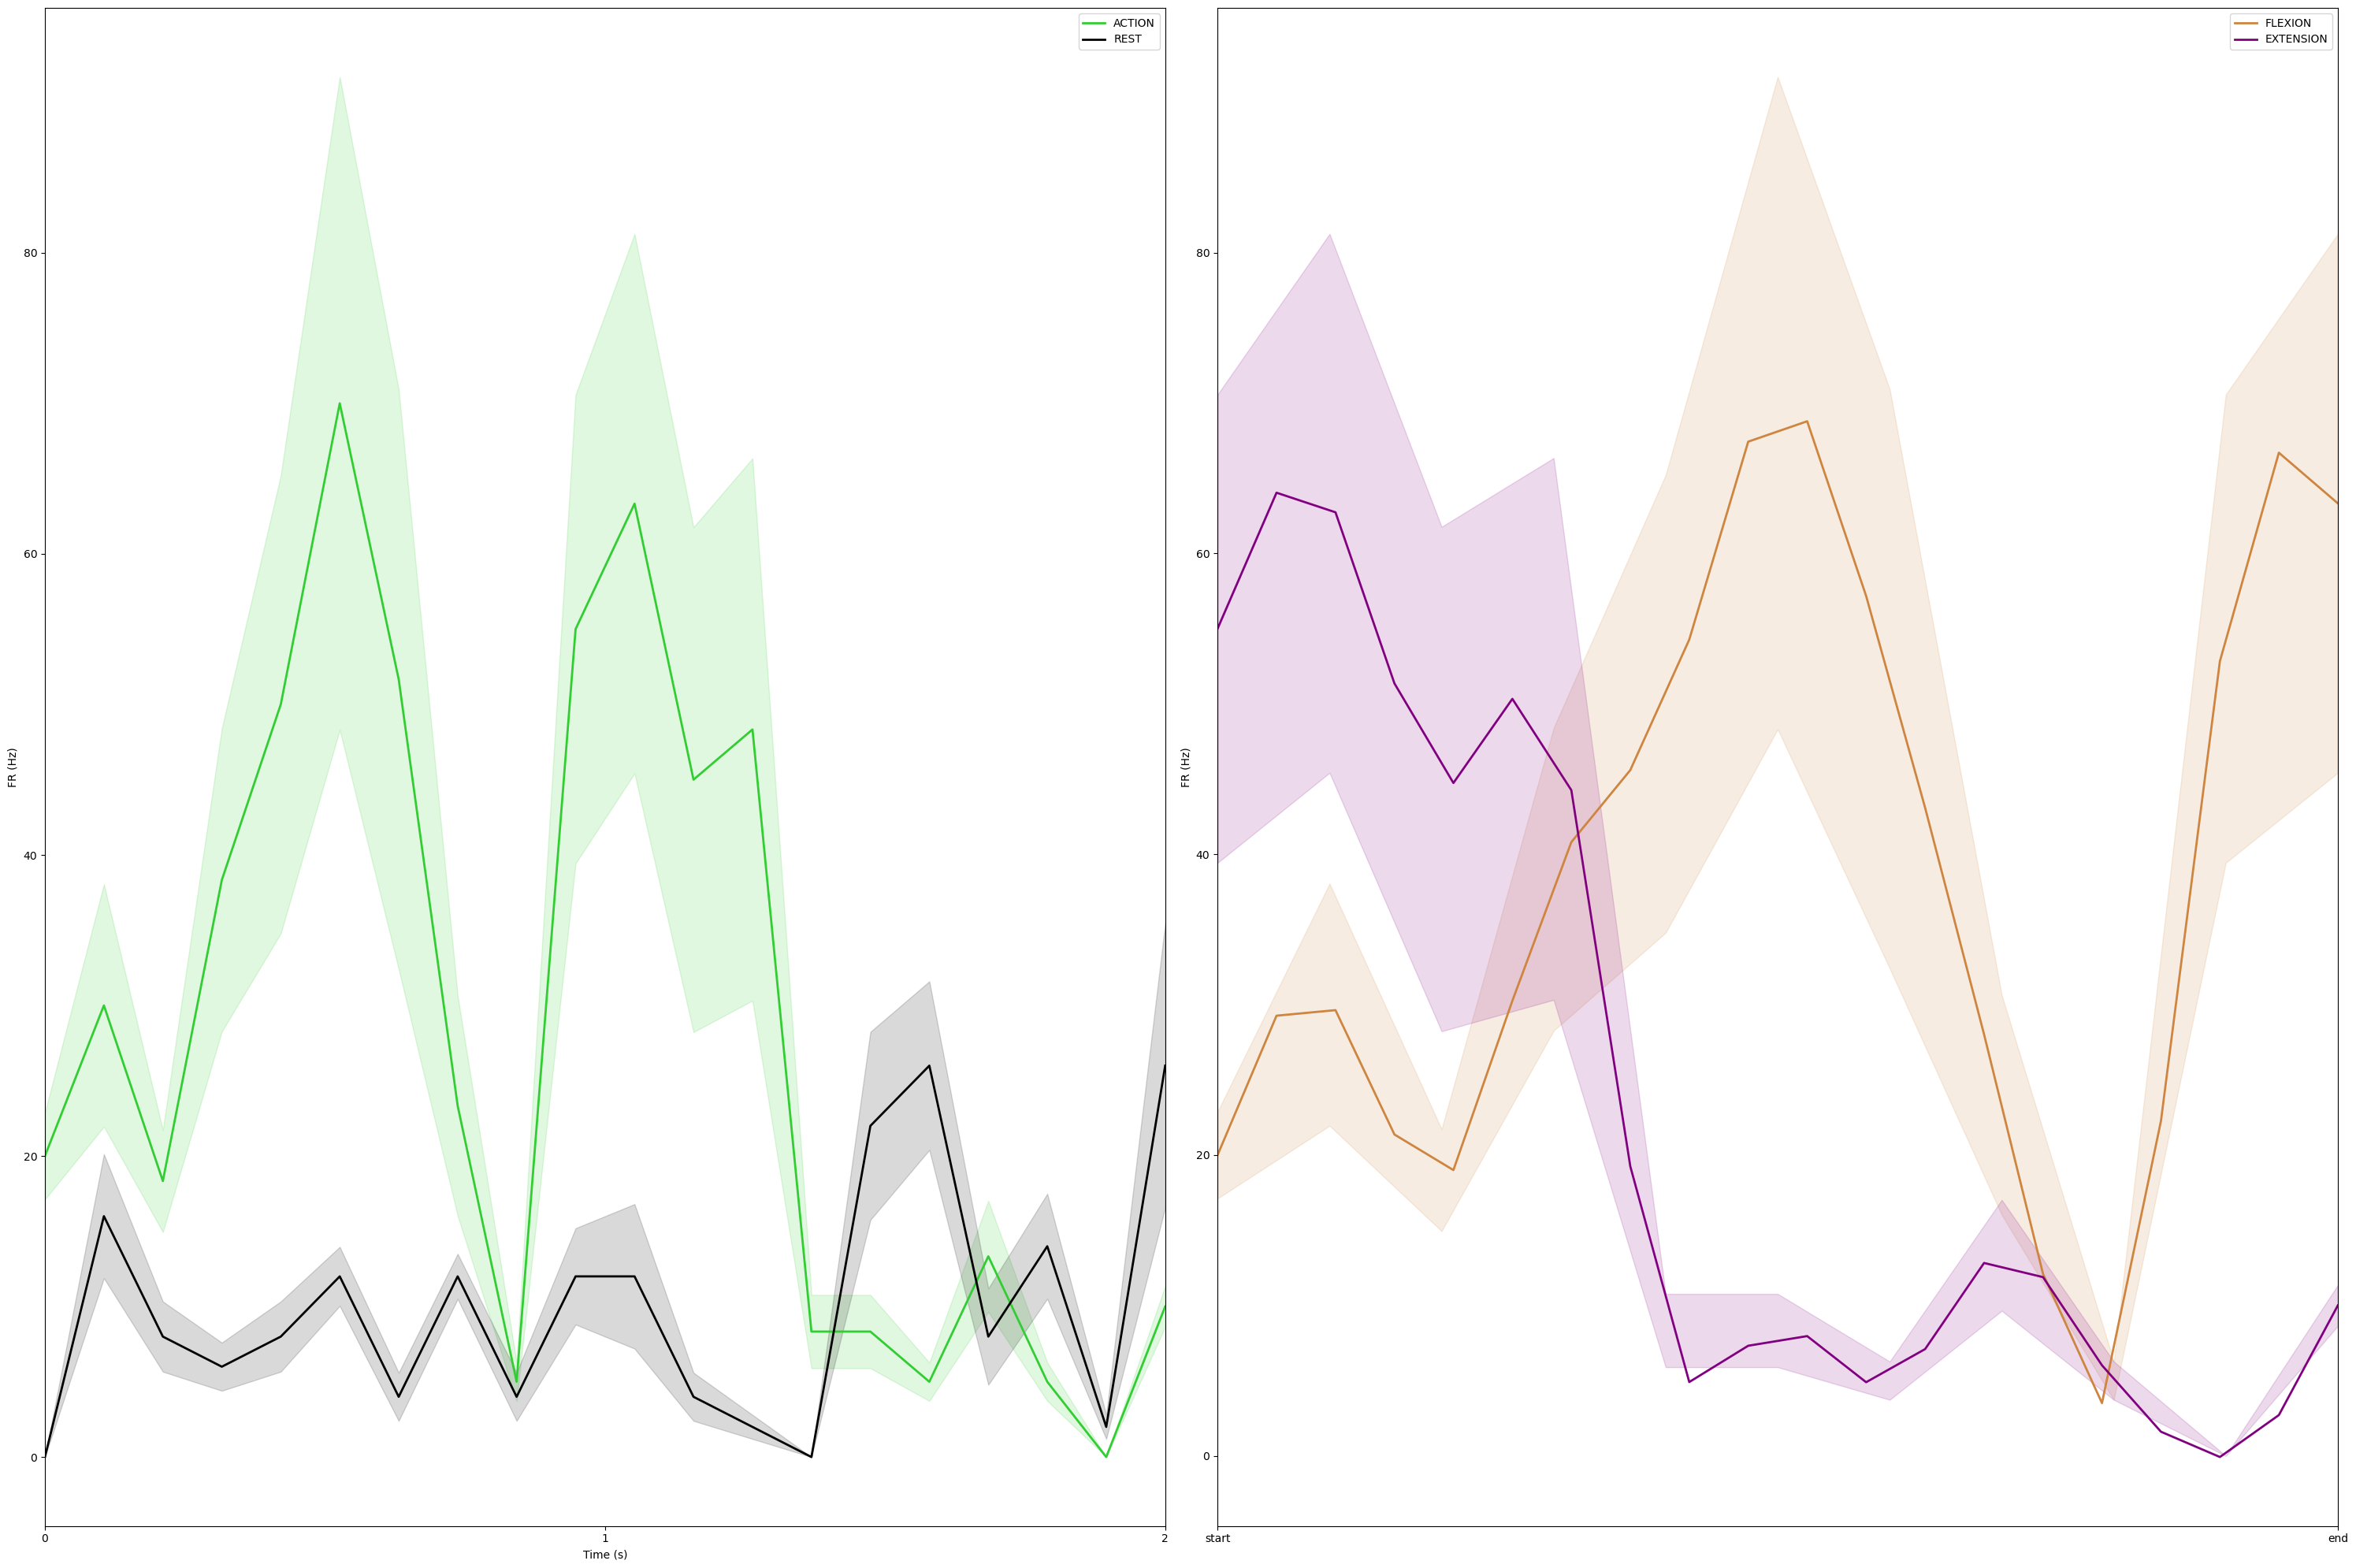

In [3]:
#Figure 2A
#Knee
first_panel_data = df[2:6]['Unnamed: 1']
average_rest_knee, std_rest_knee = np.fromstring(first_panel_data[4].strip("[]"), sep=" "), np.fromstring(first_panel_data[5].strip("[]"), sep=" ")
average_knee, std_knee = np.fromstring(first_panel_data[2].strip("[]"), sep=" "), np.fromstring(first_panel_data[3].strip("[]"), sep=" ")
second_panel_data = df[7:11]['Unnamed: 1']
average_flexion_knee, std_flexion_knee = np.fromstring(second_panel_data[7].strip("[]"), sep=" "), np.fromstring(second_panel_data[8].strip("[]"), sep=" ")
average_extension_knee, std_extension_knee = np.fromstring(second_panel_data[9].strip("[]"), sep=" "), np.fromstring(second_panel_data[10].strip("[]"), sep=" ")

#Ankle
first_panel_data = df[14:18]['Unnamed: 1']
average_rest_ankle, std_rest_ankle = np.fromstring(first_panel_data[16].strip("[]"), sep=" "), np.fromstring(first_panel_data[17].strip("[]"), sep=" ")
average_ankle, std_ankle = np.fromstring(first_panel_data[14].strip("[]"), sep=" "), np.fromstring(first_panel_data[15].strip("[]"), sep=" ")
second_panel_data = df[19:23]['Unnamed: 1']
average_flexion_ankle, std_flexion_ankle = np.fromstring(second_panel_data[19].strip("[]"), sep=" "), np.fromstring(second_panel_data[20].strip("[]"), sep=" ")
average_extension_ankle, std_extension_ankle = np.fromstring(second_panel_data[21].strip("[]"), sep=" "), np.fromstring(second_panel_data[22].strip("[]"), sep=" ")

#Toes
first_panel_data = df[26:30]['Unnamed: 1']
average_rest_toes, std_rest_toes = np.fromstring(first_panel_data[28].strip("[]"), sep=" "), np.fromstring(first_panel_data[29].strip("[]"), sep=" ")
average_toes, std_toes = np.fromstring(first_panel_data[26].strip("[]"), sep=" "), np.fromstring(first_panel_data[27].strip("[]"), sep=" ")
second_panel_data = df[31:35]['Unnamed: 1']
average_flexion_toes, std_flexion_toes = np.fromstring(second_panel_data[31].strip("[]"), sep=" "), np.fromstring(second_panel_data[32].strip("[]"), sep=" ")
average_extension_toes, std_extension_toes = np.fromstring(second_panel_data[33].strip("[]"), sep=" "), np.fromstring(second_panel_data[34].strip("[]"), sep=" ")

fig = plt.figure(figsize=(15, 5))
subfigs = fig.subfigures(1, 3, wspace=0.1)
titles = ['Knee EL-2 AS-L3', 'Ankle EL-2 AS-L3', 'Toes EL-4 AS-L4']
average_action = [average_knee, average_ankle, average_toes]
std_action = [std_knee, std_ankle, std_toes]
average_rest = [average_rest_knee, average_rest_ankle, average_rest_toes]
std_rest = [std_rest_knee, std_rest_ankle, std_rest_toes]
average_flexion = [average_flexion_knee, average_flexion_ankle, average_flexion_toes]
average_extension = [average_extension_knee, average_extension_ankle, average_extension_toes]
std_flexion = [std_flexion_knee, std_flexion_ankle, std_flexion_toes]
std_extension = [std_extension_knee, std_extension_ankle, std_extension_toes]

for i in range(3):
    fig, ax = plt.subplots(ncols = 2, figsize=(30,20))

    ax[0].plot(np.linspace(0, 2, 20), average_action[i]*(1/factor), 'limegreen', label='ACTION', lw=2)
    ax[0].plot(np.linspace(0, 2, 20), average_rest[i]*(1/factor), 'black', label='REST', lw=2)
    ax[0].fill_between(np.linspace(0,2,20), average_action[i]*(1/factor)-std_action[i]*(1/factor), average_action[i]*(1/factor)+std_action[i]*(1/factor), color='limegreen', alpha=.15)
    ax[0].fill_between(np.linspace(0,2,20), average_rest[i]*(1/factor)-std_rest[i]*(1/factor), average_rest[i]*(1/factor)+std_rest[i]*(1/factor), color='black', alpha=.15)

    ax[0].set_xlim([0, 2])
    ax[0].set_xticks([0,1,2], labels=[0,1,2])
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('FR (Hz)')
    ax[0].legend()

    xnew = np.linspace(0, 1, 20)
    spl_flexion = make_interp_spline(np.linspace(0, 1, 11), average_flexion[i], k=2)
    spl_extension = make_interp_spline(np.linspace(0, 1, 11), average_extension[i], k=2)
    mean_flexion_spl = spl_flexion(xnew)
    mean_extention_spl = spl_extension(xnew)
    ax[1].plot(xnew, mean_flexion_spl*(1/factor), 'peru', label='FLEXION', lw=2)
    ax[1].plot(xnew, mean_extention_spl*(1/factor), 'purple', label='EXTENSION', lw=2)
    ax[1].fill_between(np.linspace(0,1,11), average_flexion[i]*(1/factor) - std_flexion[i]*(1/factor), average_flexion[i]*(1/factor) + std_flexion[i]*(1/factor), color='peru', alpha=.15)
    ax[1].fill_between(np.linspace(0,1,11), average_extension[i]*(1/factor) - std_extension[i]*(1/factor), average_extension[i]*(1/factor) + std_extension[i]*(1/factor), color='purple', alpha=.15)
   
    ax[1].set_xlim([0, 1])
    ax[1].set_xticks([0,1], labels=['start', 'end'])
    ax[1].set_ylabel('FR (Hz)')
    ax[1].legend()

plt.tight_layout()
plt.show()


## FIGURE 2F

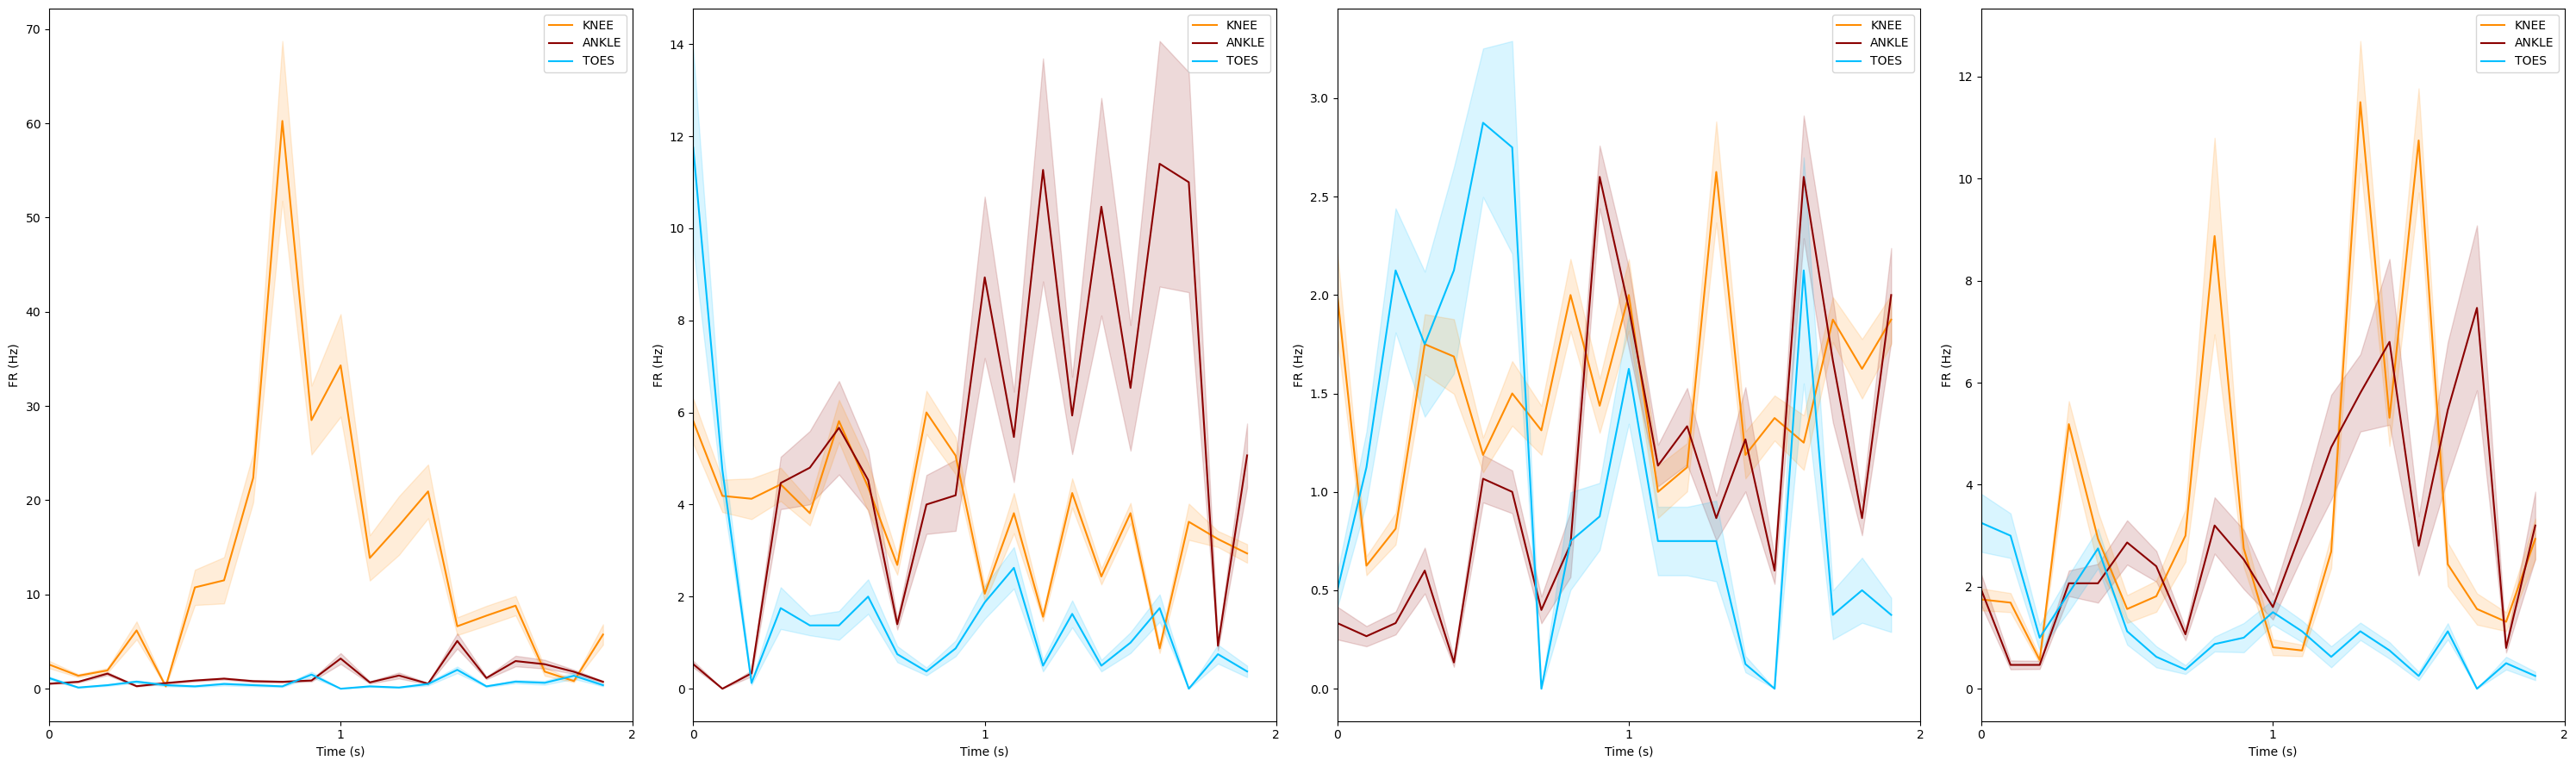

In [4]:
#Figure 2F
average_knee, average_ankle, average_toes = [], [], []
std_knee, std_ankle, std_toes = [], [], []

#Knee-specific
first_panel_data = df[38:44]['Unnamed: 1']
average_knee.append(np.fromstring(first_panel_data[38].strip("[]"), sep=" "))
std_knee.append(np.fromstring(first_panel_data[39].strip("[]"), sep=" "))
average_ankle.append(np.fromstring(first_panel_data[40].strip("[]"), sep=" "))
std_ankle.append(np.fromstring(first_panel_data[41].strip("[]"), sep=" "))
average_toes.append(np.fromstring(first_panel_data[42].strip("[]"), sep=" "))
std_toes.append(np.fromstring(first_panel_data[43].strip("[]"), sep=" "))

#Ankle-specific
second_panel_data = df[46:52]['Unnamed: 1']
average_knee.append(np.fromstring(second_panel_data[46].strip("[]"), sep=" "))
std_knee.append(np.fromstring(second_panel_data[47].strip("[]"), sep=" "))
average_ankle.append(np.fromstring(second_panel_data[48].strip("[]"), sep=" "))
std_ankle.append(np.fromstring(second_panel_data[49].strip("[]"), sep=" "))
average_toes.append(np.fromstring(second_panel_data[50].strip("[]"), sep=" "))
std_toes.append(np.fromstring(second_panel_data[51].strip("[]"), sep=" "))

#Toes-specific
third_panel_data = df[54:60]['Unnamed: 1']
average_knee.append(np.fromstring(third_panel_data[54].strip("[]"), sep=" "))
std_knee.append(np.fromstring(third_panel_data[55].strip("[]"), sep=" "))
average_ankle.append(np.fromstring(third_panel_data[56].strip("[]"), sep=" "))
std_ankle.append(np.fromstring(third_panel_data[57].strip("[]"), sep=" "))
average_toes.append(np.fromstring(third_panel_data[58].strip("[]"), sep=" "))
std_toes.append(np.fromstring(third_panel_data[59].strip("[]"), sep=" "))

#Multi-joint
fourth_panel_data = df[62:68]['Unnamed: 1']
average_knee.append(np.fromstring(fourth_panel_data[62].strip("[]"), sep=" "))
std_knee.append(np.fromstring(fourth_panel_data[63].strip("[]"), sep=" "))
average_ankle.append(np.fromstring(fourth_panel_data[64].strip("[]"), sep=" "))
std_ankle.append(np.fromstring(fourth_panel_data[65].strip("[]"), sep=" "))
average_toes.append(np.fromstring(fourth_panel_data[66].strip("[]"), sep=" "))
std_toes.append(np.fromstring(fourth_panel_data[67].strip("[]"), sep=" "))

titles = ['Single-Joint Knee EL-2 AS-R6', 'Single-Joint Ankle EL-3 AS-R7', 'Single-Joint Toes EL-3 AS-L6', 'Multi-Joint EL-4 AS-L4']
fig, ax = plt.subplots(ncols=4, figsize=(30,9))
for i in range(4):
    time = np.arange(0, len(average_knee[i])/(1/factor), 1/(1/factor))
    ax[i].plot(time, average_knee[i],color='darkorange', label='KNEE')
    ax[i].plot(time, average_ankle[i],color='darkred', label='ANKLE')
    ax[i].plot(time, average_toes[i],color='deepskyblue', label='TOES')
    ax[i].fill_between(time, average_ankle[i] - std_ankle[i], average_ankle[i] + std_ankle[i], color='darkred', alpha=.15)
    ax[i].fill_between(time, average_toes[i] - std_toes[i], average_toes[i] + std_toes[i], color='deepskyblue', alpha=.15)
    ax[i].fill_between(time, average_knee[i] - std_knee[i], average_knee[i] + std_knee[i], color='darkorange', alpha=.15)
    #ax[i][row, col].fill_between(time, mean_sr_rest_knee[channel] - std_sr_rest_knee[channel], mean_sr_rest_knee[channel] + std_sr_rest_knee[channel], color='b', alpha=.15)
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xticks([0,1,2], labels=[0,1,2])
    ax[i].set_ylabel('FR (Hz)')
    ax[i].legend()
    ax[i].set_xlim([0,2])

plt.tight_layout()
plt.show()


## FIGURE 2D

In [8]:
sheet_name = 'Figure 2D-4B-4C-5B-S3-S6B'
df2 = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')[0:7]

In [69]:
def extracting_array_from_excel(df, row):
    results = np.array([el for el in df.iloc[row] if el != np.NaN and el not in ['Ankle', 'Knee', 'Toes','Flexion', 'Extension']])
    # Remove NaN values
    return results[~np.isnan(results)]

In [72]:
#Loading data
averages_peaks_ankle = extracting_array_from_excel(df2, 1)
averages_peaks_knee = extracting_array_from_excel(df2, 2)
averages_peaks_toes = extracting_array_from_excel(df2, 3)
averages_peaks_flexion = extracting_array_from_excel(df2, 5)
averages_peaks_extension = extracting_array_from_excel(df2, 6)

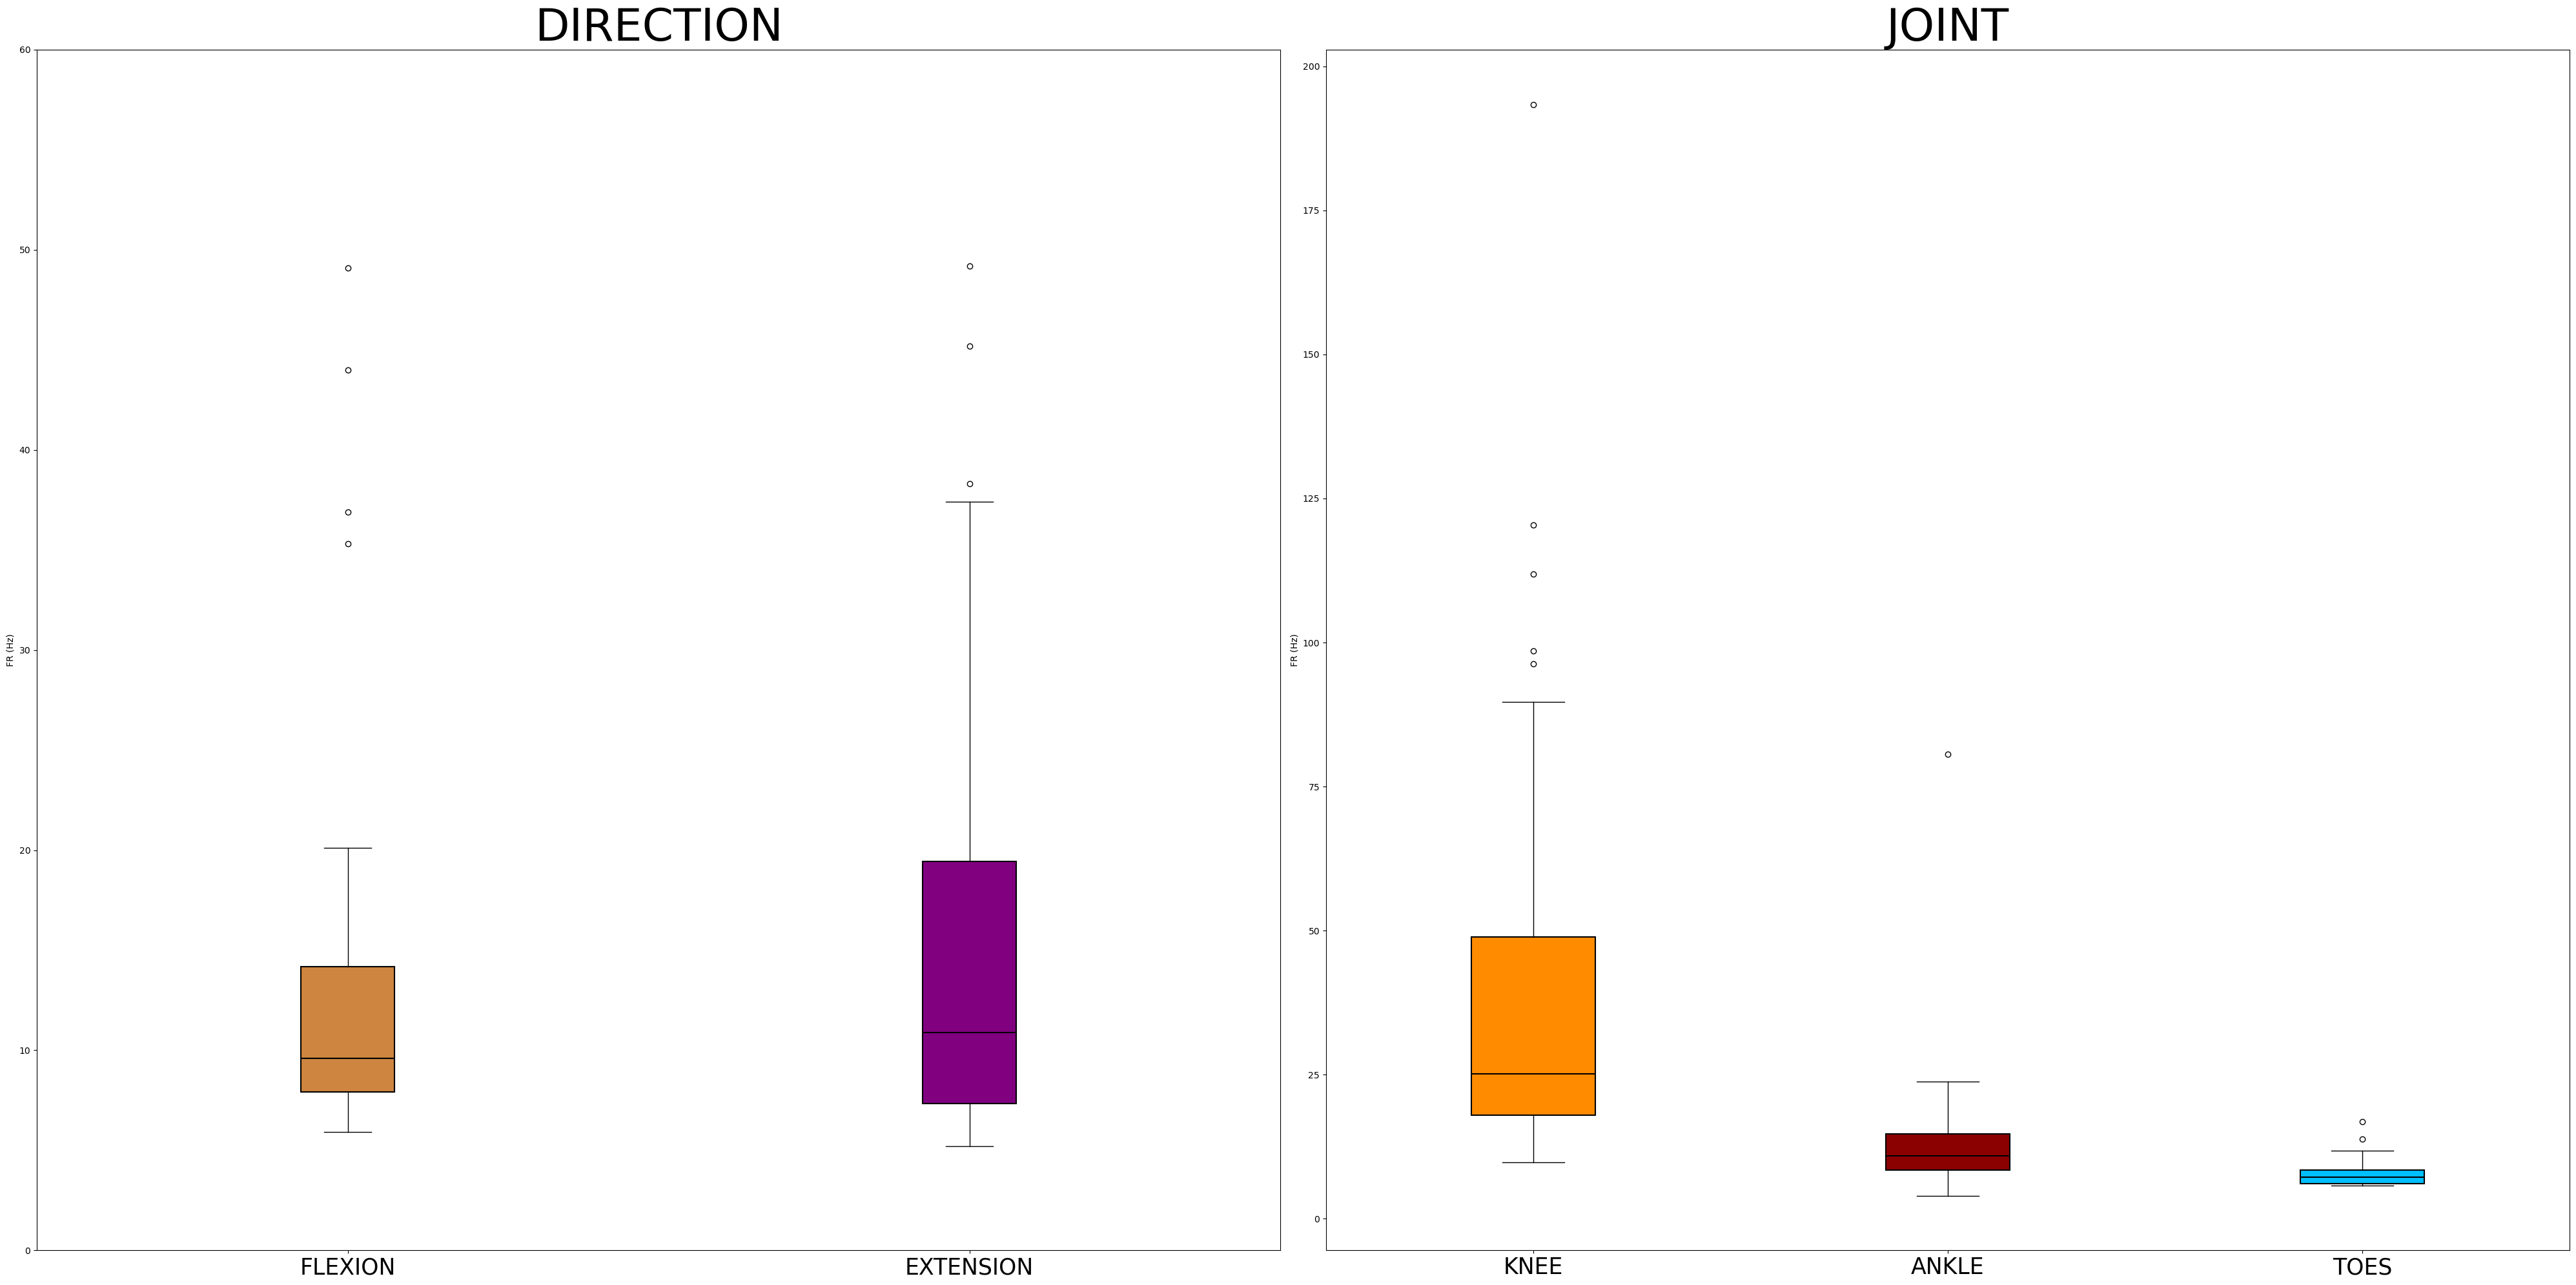

Actions Ankle
{'mean': 42.89472222222222, 'iqr': 30.949999999999996, 'cilo': 17.00141666666667, 'cihi': 33.19858333333333, 'whishi': 89.7, 'whislo': 9.8, 'fliers': array([120.4,  98.6, 193.4, 111.9,  96.3]), 'q1': 18.0, 'med': 25.1, 'q3': 48.949999999999996}
Actions Knee
{'mean': 13.254761904761907, 'iqr': 6.324999999999999, 'cilo': 9.367729159038936, 'cihi': 12.432270840961062, 'whishi': 23.8, 'whislo': 4.0, 'fliers': array([80.6]), 'q1': 8.425, 'med': 10.899999999999999, 'q3': 14.75}
Actions Toes
{'mean': 8.541666666666666, 'iqr': 2.4000000000000004, 'cilo': 6.112272092846744, 'cihi': 8.287727907153254, 'whishi': 11.8, 'whislo': 5.8, 'fliers': array([16.9, 13.8]), 'q1': 6.1, 'med': 7.199999999999999, 'q3': 8.5}
Flexions
{'mean': 13.725000000000001, 'iqr': 6.275000000000001, 'cilo': 7.958041666666667, 'cihi': 11.241958333333335, 'whishi': 20.1, 'whislo': 5.9, 'fliers': array([49.1, 36.9, 44. , 35.3]), 'q1': 7.8999999999999995, 'med': 9.600000000000001, 'q3': 14.175}
Extension
{'mean':

In [81]:
# FIGURE 2D
fig, ax = plt.subplots(ncols=2, figsize=(40,20))

distributions_joints = [averages_peaks_knee, averages_peaks_ankle, averages_peaks_toes]
distributions_direction = [averages_peaks_flexion, averages_peaks_extension]

colors = ['darkorange','darkred','deepskyblue']
labels = ['KNEE', 'ANKLE', 'TOES']

boxprops = dict(color="black",linewidth=1.5)
medianprops = dict(color="black",linewidth=1.5)
bplot = ax[1].boxplot(distributions_joints, patch_artist=True, labels=labels, boxprops=boxprops, medianprops=medianprops)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax[1].set_title('JOINT', fontsize=50)
ax[1].set_ylabel('FR (Hz)')
ax[1].set_xticks([1,2,3], labels=labels, fontsize=25)


colors = ['peru', 'purple']
labels = ['FLEXION', 'EXTENSION']
boxprops = dict(color="black",linewidth=1.5)
medianprops = dict(color="black",linewidth=1.5)
bplot = ax[0].boxplot(distributions_direction, patch_artist=True, boxprops=boxprops, medianprops=medianprops, labels=labels,)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax[0].set_title('DIRECTION', fontsize=50)
ax[0].set_ylabel('FR (Hz)')
ax[0].set_xticks([1,2], labels=labels, fontsize=25)
ax[0].set_ylim([0, 60])


plt.tight_layout()
plt.show()

stats = boxplot_stats(distributions_joints, whis=1.5, bootstrap=None, labels=None, autorange=False)
print("Actions Ankle")
print(stats[0])
print("Actions Knee")
print(stats[1])
print("Actions Toes")
print(stats[2])

stats = boxplot_stats(distributions_direction, whis=1.5, bootstrap=None, labels=None, autorange=False)
print("Flexions")
print(stats[0])
print("Extension")
print(stats[1])